# SDialog dependencies

In [1]:
# Setup the environment depending on weather we are running in Google Colab or Jupyter Notebook
from IPython import get_ipython


if "google.colab" in str(get_ipython()):
    print("Running on CoLab")

    # Installing Ollama (if you are not planning to use Ollama, you can just comment these lines to speed up the installation)
    !curl -fsSL https://ollama.com/install.sh | sh

    # Installing sdialog
    !git clone https://github.com/qanastek/sdialog.git
    %cd sdialog
    %pip install -e .
    %cd ..
else:
    print("Running in Jupyter Notebook")
    # Little hack to avoid the "OSError: Background processes not supported." error in Jupyter notebooks"
    import os
    get_ipython().system = os.system

Running in Jupyter Notebook


## Locally

Run following commands and then `Restart` your environment.

In [2]:
%%script false --no-raise-error
%pip install -e ..
%pip show sdialog

# Tutorial 8: Room generation and creation

## Medical room generator

In [3]:
from sdialog.audio.jsalt import MedicalRoomGenerator, RoomRole

/Users/yanislabrak/opt/miniconda3/envs/jsalt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
generator = MedicalRoomGenerator()
room = generator.generate({"room_type": RoomRole.CONSULTATION})
print(room)
room = generator.generate({"room_type": RoomRole.EXAMINATION})
print(room)
room = generator.generate({"room_type": RoomRole.TREATMENT})
print(room)
room = generator.generate({"room_type": RoomRole.PATIENT_ROOM})
print(room)
room = generator.generate({"room_type": RoomRole.SURGERY})
print(room)
room = generator.generate({"room_type": RoomRole.WAITING})
print(room)
room = generator.generate({"room_type": RoomRole.EMERGENCY})
print(room)
room = generator.generate({"room_type": RoomRole.OFFICE})
print(room)
print(room.get_square_meters())
print(room.get_volume())

1759859614348398000:  consultation_room - 1759859614348368000, desc: consultation room - 1759859614348368000 (dimentions: dim: [2.598076211353316, 1.7320508075688772, 3.0], rt60: 0.47)(aspect_ratio: (1.5, 1.0))
1759859614350158000:  examination_room - 1759859614350147000, desc: examination room - 1759859614350147000 (dimentions: dim: [3.0, 2.0, 3.0], rt60: 0.75)(aspect_ratio: (1.5, 1.0))
1759859614350210000:  treatment_room - 1759859614350206000, desc: treatment room - 1759859614350206000 (dimentions: dim: [3.577708763999664, 2.23606797749979, 3.0], rt60: 0.7)(aspect_ratio: (1.6, 1.0))
1759859614350247000:  patient_room - 1759859614350244000, desc: patient room - 1759859614350244000 (dimentions: dim: [4.018706259482024, 2.363944858518838, 3.0], rt60: 0.6)(aspect_ratio: (1.7, 1.0))
1759859614350279000:  surgery_room - 1759859614350276000, desc: surgery room - 1759859614350276000 (dimentions: dim: [4.6475800154489, 2.581988897471611, 3.0], rt60: 0.77)(aspect_ratio: (1.8, 1.0))
1759859614

## Basic room generator

In [5]:
from sdialog.audio.room_generator import BasicRoomGenerator
generator = BasicRoomGenerator()
room = generator.generate({"room_size": 8})
print(room)
room = generator.generate({"room_size": 20})
print(room)

1759859614355052000:  room_1759859614355026000, desc: room_1759859614355027000 (dimentions: dim: [4.0, 2.0, 2.5], rt60: 0.3625681229591343)(aspect_ratio: (2.0, 1.0))
1759859614355127000:  room_1759859614355125000, desc: room_1759859614355125000 (dimentions: dim: [4.47213595499958, 4.47213595499958, 3.5], rt60: 0.3598544763240216)(aspect_ratio: (1.0, 1.0))


Show the square meters and volume ($m^3$) of the room

In [6]:
print(room.get_square_meters())
print(room.get_volume())

20.000000000000004
70.00000000000001


## Vizualization of the room

In [7]:
img = room.to_image()

Print the image of the room

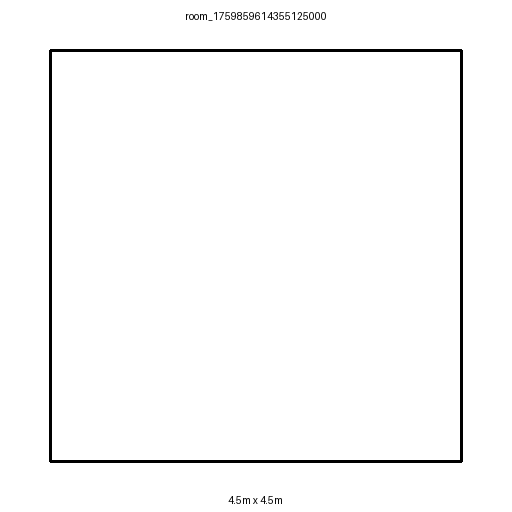

In [8]:
display(img)

or save the image locally

In [9]:
img.save("room.png")

## Custom room generator

In [ ]:
import random
from sdialog.audio.room import Room
from typing import Tuple, Dict, Any
from sdialog.audio.room_generator import Dimensions3D
from sdialog.audio.room_generator import RoomGenerator

In [18]:
class CustomRoomGenerator(RoomGenerator):

    def __init__(self):
        super().__init__()

        # Standard room sizes (floor area in m²): size, rt60, name, description
        self.ROOM_SIZES: Dict[str, Tuple[float, float, str, str]] = {
            "big_warehouse": ([1000, 2500], 0.47, "big_warehouse", "big warehouse"),
            "small_warehouse": ([100, 200, 300], 0.75, "small_warehouse", "small warehouse"),
        }

        self.ROOM_ASPECT_RATIOS = {
            100: (1.5, 1.0), 200: (1.5, 1.0), 300: (1.6, 1.0),
            1000: (1.7, 1.0), 2500: (1.8, 1.0),
        }

    def calculate_room_dimensions(self, floor_area: float, aspect_ratio: Tuple[float, float]) -> Dimensions3D:
        """
        Calculate room dimensions from floor area
        floor_area: float
        aspect_ratio: Tuple[float, float]
        """

        w_ratio, l_ratio = aspect_ratio

        length = math.sqrt(floor_area / (w_ratio / l_ratio))
        width = length * (w_ratio / l_ratio)

        return Dimensions3D(width=width, length=length, height=10)

    def generate(self, args: Dict[str, Any]) -> Room:
        """
        Generate a room based on predefined warehouse setups.
        args:
            warehouse_type: str
        """

        if "warehouse_type" not in args:
            raise ValueError("warehouse_type is required")

        if len(args) > 1:
            raise ValueError("Only warehouse_type is allowed")

        floor_area, rt60, name, description = self.ROOM_SIZES[args["warehouse_type"]]

        # Randomly select a floor area from the list
        floor_area = random.choice(floor_area)

        if floor_area not in self.ROOM_ASPECT_RATIOS:
            raise ValueError(f"Unsupported room size: {floor_area}m²")

        w_ratio, l_ratio = self.ROOM_ASPECT_RATIOS[floor_area]

        # Time in nanoseconds
        time_in_ns = time.time_ns()

        return Room(
            name=f"Warehouse: {name} - {time_in_ns}",
            description=f"Warehouse: {description} - {time_in_ns}",
            dimensions=self.calculate_room_dimensions(floor_area, (w_ratio, l_ratio)),
            rt60=rt60,
            aspect_ratio=(w_ratio, l_ratio)
        )


In [19]:
room = CustomRoomGenerator().generate({"warehouse_type": "big_warehouse"})
print(room)
print(room.get_square_meters())
print(room.get_volume())

print("-"*100)

room = CustomRoomGenerator().generate({"warehouse_type": "small_warehouse"})
print(room)
print(room.get_square_meters())
print(room.get_volume())


NameError: name 'random' is not defined